In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import dask.dataframe as dd

In [67]:
all_partitions = [i for i in os.listdir('../allele_freq_partitions/') if '.csv' in i]

In [37]:
all_pvalues = {}
for partition_name in all_partitions:
    snps = pd.read_csv(f'../allele_freq_partitions/{partition_name}',usecols=['0'])
    p_values = pd.read_csv(f'full/pvalues_{partition_name}').drop('Unnamed: 0',axis=1)
    ## name the snps by thier position
    p_values.columns = snps.values.flatten()
    all_pvalues[partition_name] = p_values

In [40]:
pd.concat(all_pvalues,axis=1).to_csv('p_values_full.csv')

In [51]:
all_pvalues = pd.concat(all_pvalues,axis=1)

In [55]:
all_pvalues.columns = all_pvalues.columns.droplevel(0)

In [57]:
all_pvalues.to_csv('p_values_full.csv')

In [61]:
all_pvalues.T.to_csv('p_values_full_t.csv')

In [59]:
p_values_full1 = dd.read_csv('p_values_full_t.csv', sep = ',')

ValueError: An error occurred while calling the read_csv method registered to the pandas backend.
Original Message: Sample is not large enough to include at least one row of data. Please increase the number of bytes in `sample` in the call to `read_csv`/`read_table`

In [64]:
p_values_full1 = pd.read_csv('p_values_full_t.csv', nrows=10)

In [65]:
p_values_full1

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,1_9636167,0.038509,0.663602,0.732930,0.721144,0.980847,0.860642,0.315855,0.769356,0.128945,...,0.352510,0.163451,0.311714,0.220637,0.994159,0.370111,0.893399,0.243041,0.560458,0.640006
1,1_9636249,0.193608,0.680945,0.157762,0.111332,0.106277,0.192460,0.282360,0.491188,0.788748,...,0.197694,0.544810,0.564844,0.983300,0.141240,0.175850,0.018250,0.135603,0.002515,0.793482
2,1_9636265,0.534019,0.175964,0.368156,0.365647,0.559596,0.501515,0.378682,0.526227,0.848803,...,0.912615,0.727844,0.945387,0.452921,0.729145,0.916314,0.166773,0.363044,0.132004,0.927567
3,1_9636311,0.177085,0.754946,0.173093,0.122862,0.106797,0.201814,0.311305,0.511824,0.814805,...,0.213450,0.573892,0.542366,0.990556,0.126064,0.189529,0.019642,0.131527,0.002564,0.789056
4,1_9636333,0.876517,0.653374,0.897871,0.763714,0.616818,0.741474,0.735578,0.351843,0.611969,...,0.758840,0.512291,0.970072,0.821412,0.287151,0.522266,0.136744,0.646097,0.444014,0.330904
5,1_9636346,0.720362,0.761547,0.242452,0.207841,0.827621,0.184899,0.432515,0.739040,0.979676,...,0.981745,0.579361,0.148385,0.648231,0.970110,0.806925,0.870186,0.916942,0.077380,0.007323
6,1_9636411,0.783877,0.411272,0.018721,0.028629,0.768289,0.027846,0.023342,0.606829,0.839271,...,0.518552,0.274881,0.071224,0.768088,0.246830,0.317526,0.602023,0.929342,0.179801,0.086959
7,1_9636560,0.275514,0.824937,0.472042,0.430511,0.311977,0.568564,0.687728,0.237921,0.974789,...,0.508252,0.669991,0.933378,0.798777,0.164453,0.535416,0.028876,0.128607,0.207675,0.903017
8,1_9636701,0.011849,0.462479,0.226253,0.222923,0.109549,0.560429,0.093637,0.008607,0.061301,...,0.613556,0.415274,0.097876,0.387045,0.675907,0.438479,0.667819,0.153134,0.002336,0.418635
9,1_9636718,0.022016,0.508558,0.541260,0.719059,0.964940,0.659968,0.305046,0.828804,0.016343,...,0.700037,0.006249,0.201933,0.006678,0.008342,0.005978,0.016688,0.003272,0.915856,0.286742


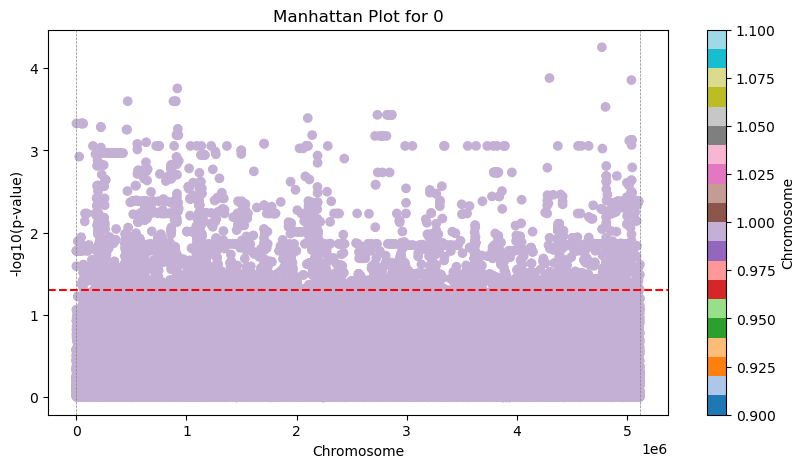

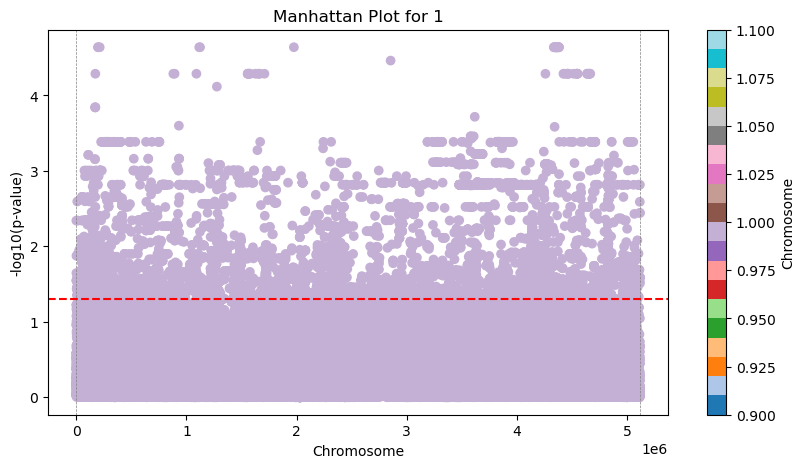

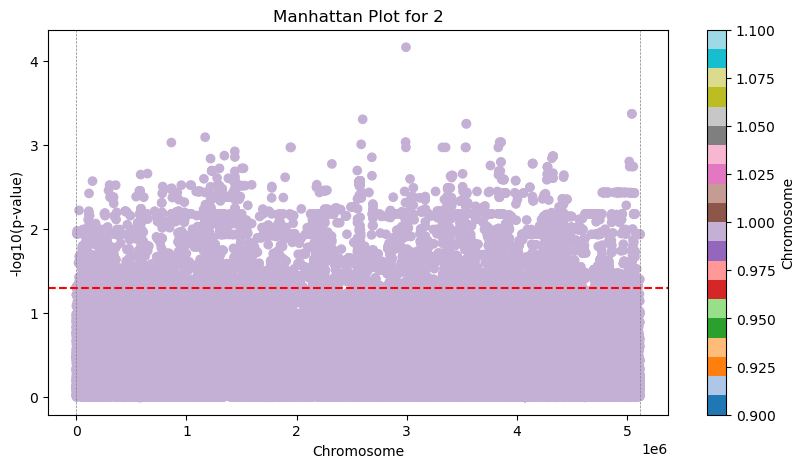

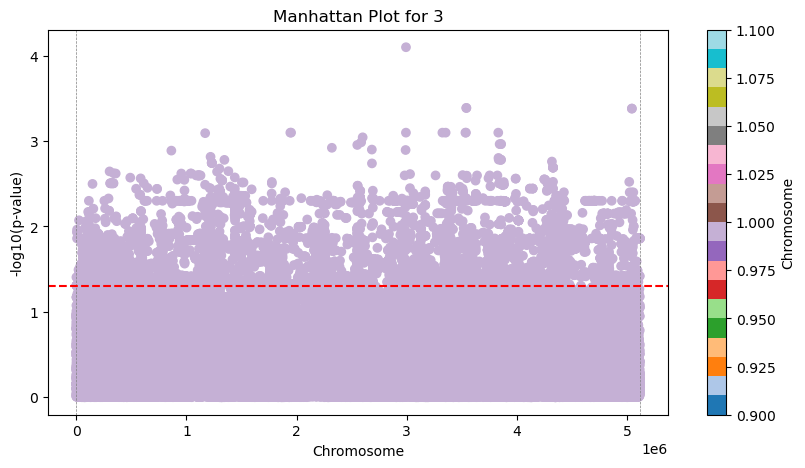

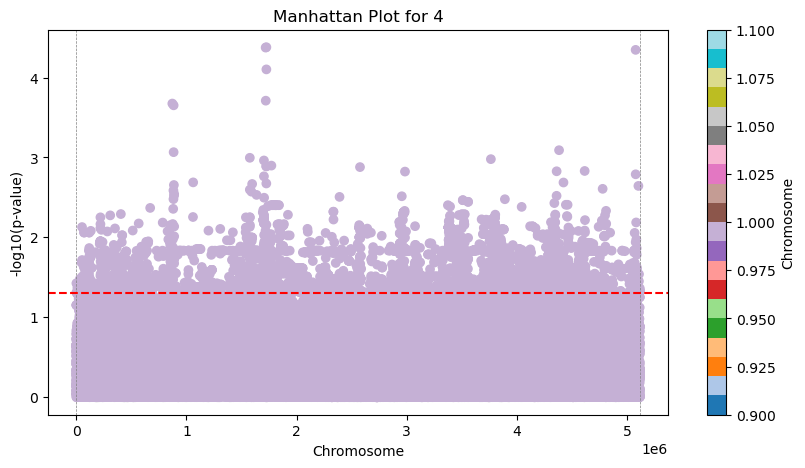

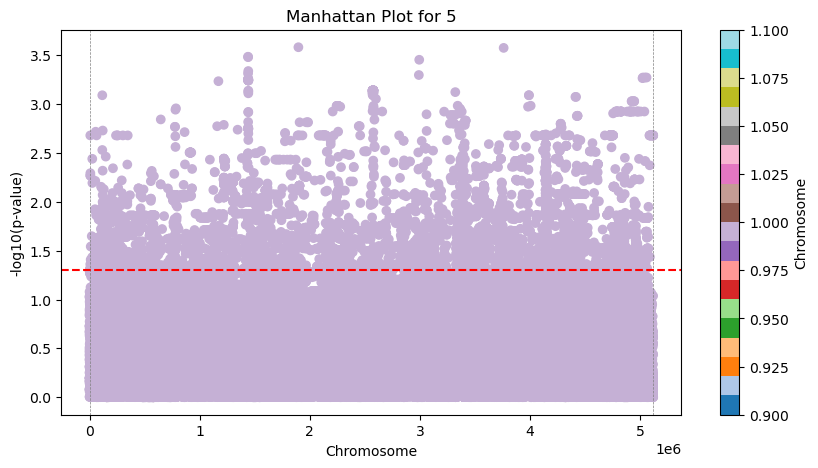

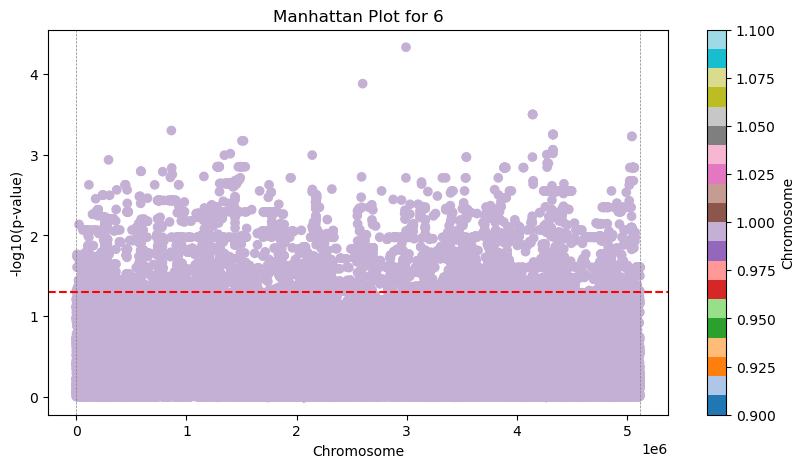

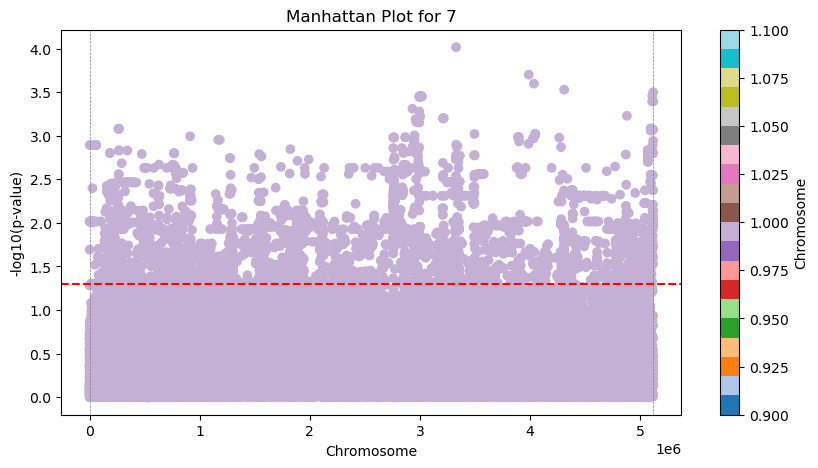

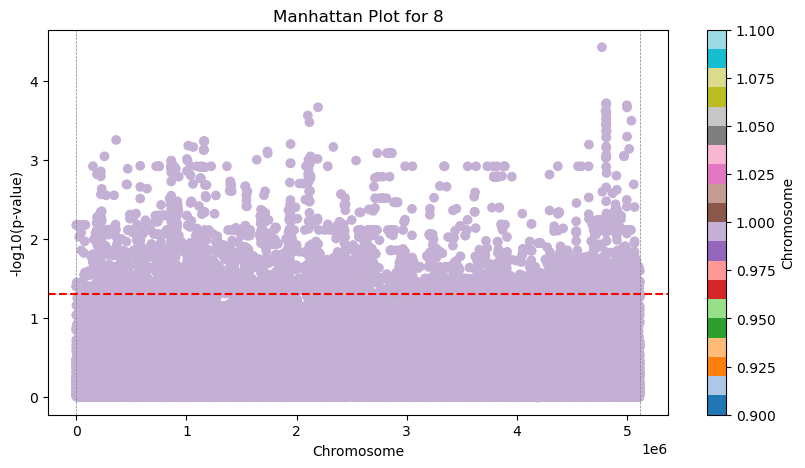

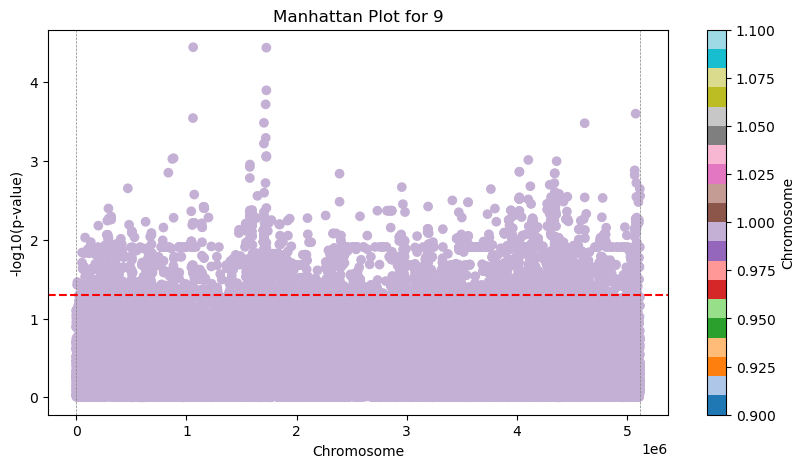

In [ ]:

# Split the column names to extract chromosome and position
chromosomes = [int(name.split('_')[0]) for name in p_values.columns]
positions = [int(name.split('_')[1]) for name in p_values.columns]

# Loop through each row to plot a Manhattan plot for each environmental variable
for index, row in p_values.iterrows():
    plt.figure(figsize=(10, 5))
    plt.title(f"Manhattan Plot for {index}")
    plt.xlabel("Chromosome")
    plt.ylabel("-log10(p-value)")
    
    # Transform p-values using -log10
    log_pvalues = -np.log10(row)
    
    # Scatter plot
    plt.scatter(positions, log_pvalues, c=chromosomes, cmap='tab20', marker='o')
    
    # Add chromosome boundaries
    boundaries = [0] + [max(positions[i] for i, x in enumerate(chromosomes) if x == ch) for ch in sorted(set(chromosomes))]
    for boundary in boundaries:
        plt.axvline(x=boundary, color='grey', linestyle='--', lw=0.5)
    
    # Significance line (adjust the threshold as necessary)
    significance_threshold = -np.log10(0.05)  # p = 0.05
    plt.axhline(y=significance_threshold, color='red', linestyle='--')
    
    plt.colorbar(label='Chromosome')
    plt.show()